## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [82]:
# Load Packages
import sys # access to system parameters https://docs.python.org/3/library/sys.html
print("Python Version: {}".format(sys.version))

import pandas as pd # Collection of functions for data processing and analysis modeled after R dataframes with Sql
print("Pandas Version: {}".format(pd.__version__))

import matplotlib
print("Matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("Numpy Version: {}".format(np.__version__))

import scipy as sp # For scientific computing and advance mathematics
print("Scipy version: {}".format(sp.__version__))

import IPython
from IPython import display # Pretty printing of dataframes in Jupyter notebook
print("IPython version: {}".format(IPython.__version__))

import sklearn # Collection of ML algo
print("scikit-learn version: {}".format(sklearn.__version__))

import random
import time

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*50)

# Input data files are available in the "../input/" directory.
from subprocess import check_output
print(check_output(["ls","../input/titanic"]))

Python Version: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
Pandas Version: 0.25.0
Matplotlib version: 3.0.3
Numpy Version: 1.17.0
Scipy version: 1.2.1
IPython version: 7.7.0
scikit-learn version: 0.21.3
--------------------------------------------------
b'gender_submission.csv\ntest.csv\ntrain.csv\n'


In [83]:
# Common model Algo
from sklearn import svm, tree, linear_model, neighbors, naive_bayes,ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common Model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualiztion
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=12,8

In [84]:
data_raw = pd.read_csv('../input/titanic/train.csv')
data_val = pd.read_csv('../input/titanic/test.csv')

#however passing by reference is convenient, because we can clean both datasets at once
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

# preview data
print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q


In [85]:
# The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
print('Train columns with null values:\n',data1.isnull().sum())
print('='*30)

print('Test/Validation columns with null values:\n',data_val.isnull().sum())
print('='*30)

data_raw.describe(include='all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nakid, Miss. Maria (""Mary"")",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [86]:
###The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
###COMPLETING: Complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:
    # complete the missing age with median
    dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
    
    # complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)
    
    # complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)

# Delete the canbin feature/columns and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin','Ticket']
data1.drop(drop_column,axis=1,inplace=True)

print(data1.isnull().sum())
print('='*30)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [87]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:
    #Discrete variable
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
    dataset['IsAlone']=1 #initialize to yes/1 is Alone
    dataset['IsAlone'].loc[dataset['FamilySize']>1]=0 #update to no/0 if family size is greate than 1
    
    dataset['Title']=dataset['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
    
    #Fare Bins/Buckets using qcut or frquency
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)
    
    #Age Bins/Buckets using cut or value
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int),5)


#Cleanup rare title names
#print(data1['Title'].value_counts())
stat_min=10
title_names = (data1['Title'].value_counts()<stat_min) #This will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x]==True else x)
print(data1['Title'].value_counts())
print('='*30)

data1.info()
data_val.info()
data1.sample(10)

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
140,0,3,"Boulos, Mrs. Joseph (Sultana)",female,28.0,0,2,15.2458,C,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
788,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,20.5750,S,4,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
588,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
437,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,18.7500,S,6,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
344,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
148,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,26.0000,S,3,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
666,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
722,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
165,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,20.5250,S,3,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"


In [88]:
# Convert Formats
# We will convert categorical data to dummy variables for mathematical analysis.

##CONVERT: convert obj to category using LabelEncoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

#define y variable aka target/outcome
Target = ['Survived']

#define x variable for original features aka feature selection
data1_x=['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone'] #Pretty name/values for charts
data1_x_calc=['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']
data1_xy = Target + data1_x
print('Original X Y: ',data1_xy,'\n')

#define x variable for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass','Embarked_Code','Title_Code','FamilySize','AgeBin_Code','FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ',data1_xy_bin,'\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ',data1_xy_dummy,'\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


In [89]:
# Re-checked the clean data again
print('Train columns with null values: \n',data1.isnull().sum())
print('='*30)
print(data1.info())
print('='*30)

print('Test/Validation columns with null values: \n',data_val.isnull().sum())
print('='*30)
print(data_val.info())
print('='*30)
data_raw.describe(include='all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null category
AgeBin  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nakid, Miss. Maria (""Mary"")",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [90]:
# Split Training and Testing Data
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


In [91]:
# Discrete Variable Correlation by Survival using
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by: ',x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('='*30,'\n')

# Using Crosstabs
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by:  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908

Survival Correlation by:  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Survival Correlation by:  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

Survival Correlation by:  Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444

Survival Correlation by:  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

Survival Correlation by:  Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

Survival Correlation by:  FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4

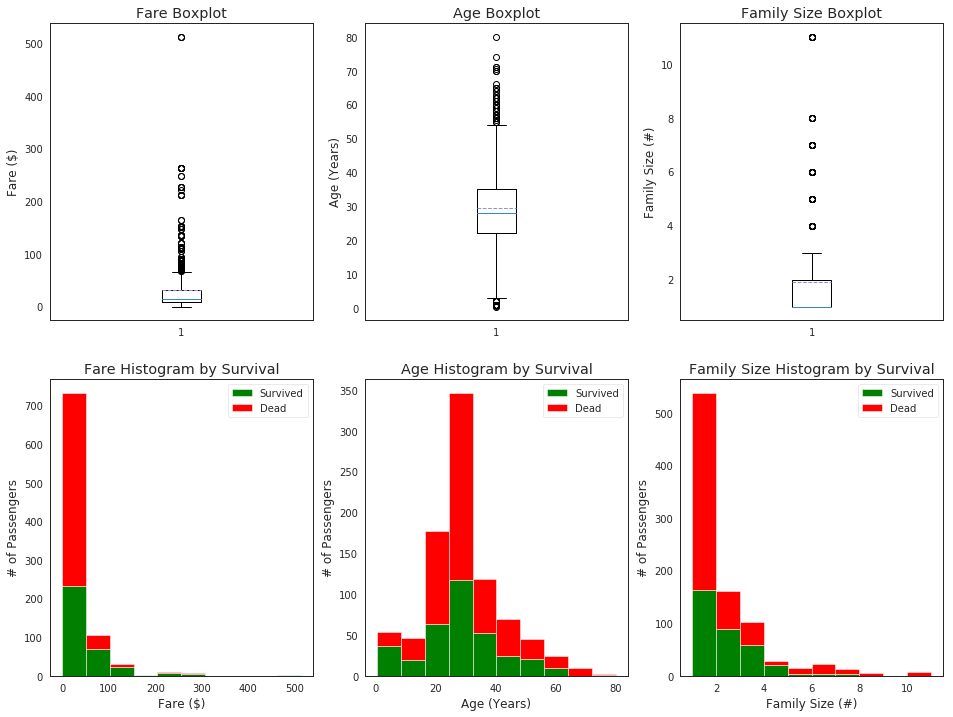

In [92]:
# Graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'],showmeans=True,meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

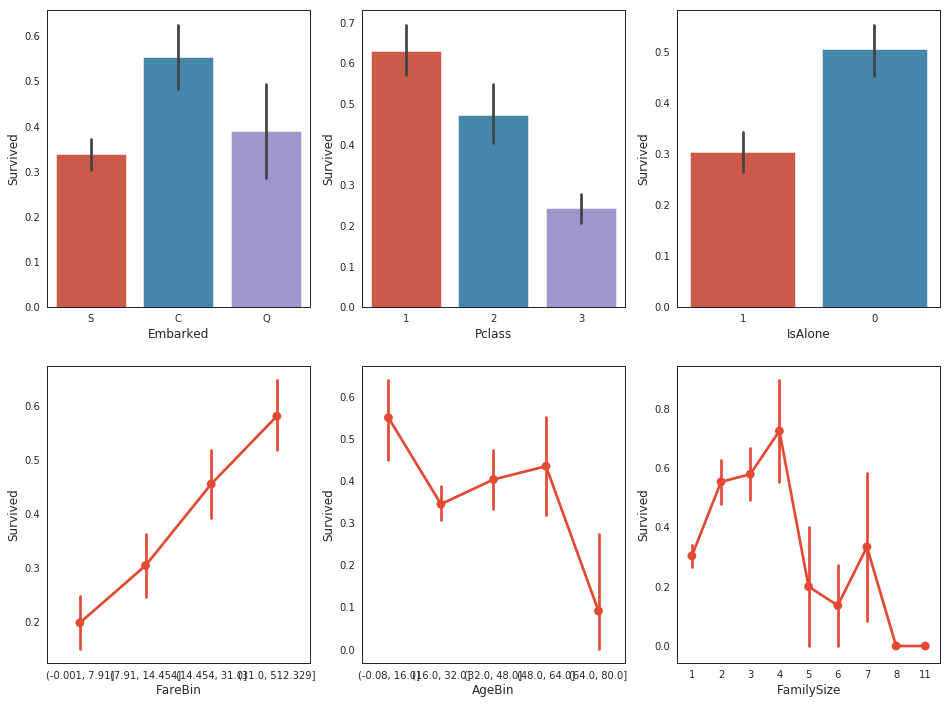

In [93]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

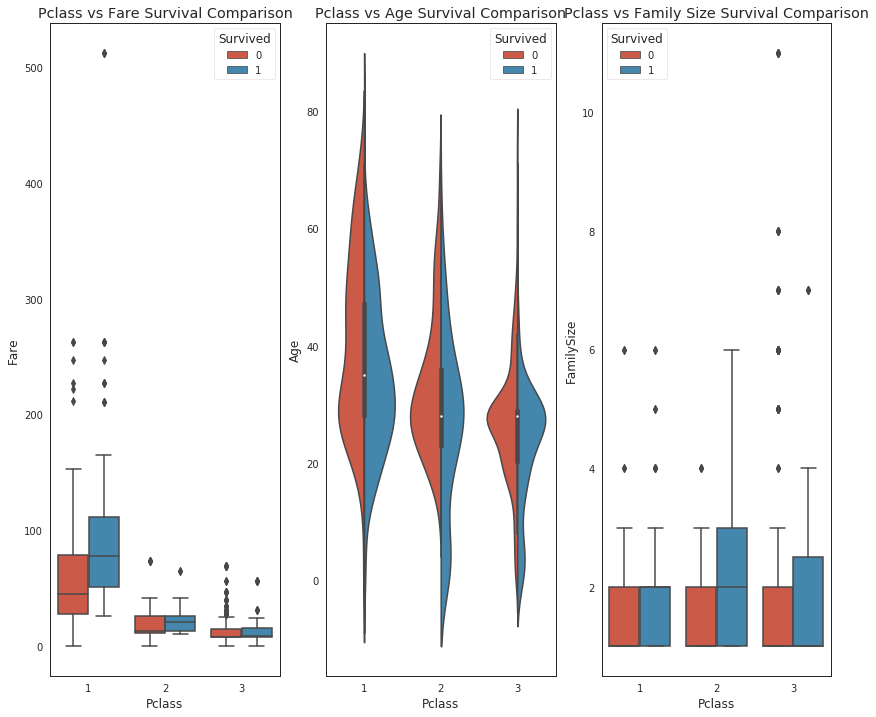

In [94]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

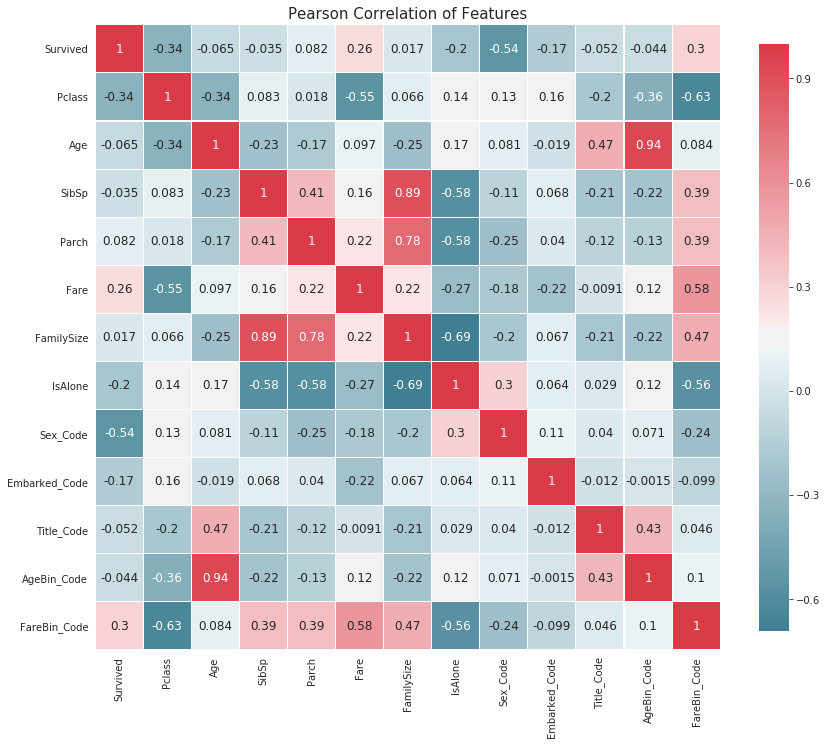

In [95]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [96]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    #sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.827239,0.0430788,0.0435434
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.839139,0.826866,0.0439856,0.0497162
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891386,0.826493,0.0456766,0.0219408
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.836517,0.826119,0.0470149,0.0577242
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.823881,0.0517353,0.0167962
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.867041,0.822015,0.0513097,0.0739672
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.849625,0.819776,0.0631347,0.00371513
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.819403,0.0594866,0.00368845
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.890262,0.817164,0.0583809,0.0196076
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.814552,0.0604996,0.00337782


Text(0, 0.5, 'Algorithm')

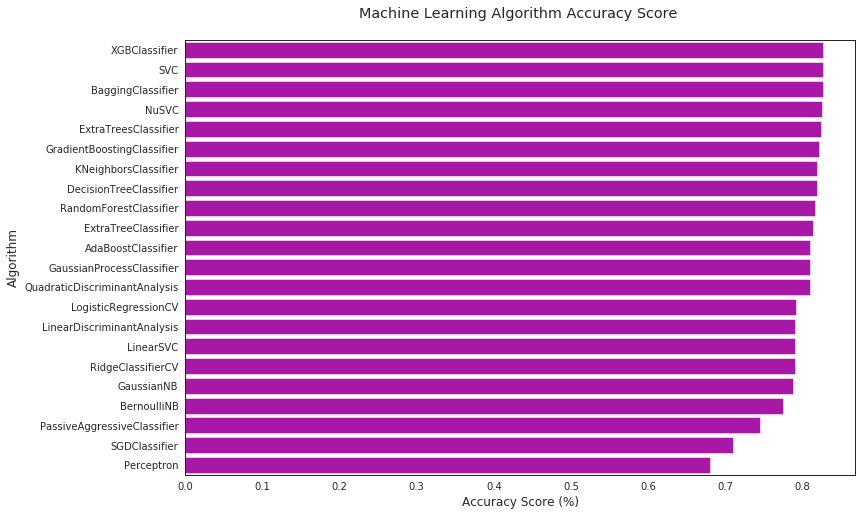

In [97]:
#Barplot 
sns.barplot(x='MLA Test Accuracy Mean',y='MLA Name', data=MLA_compare, color='m')

#Prettify
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [98]:
# base model
#GridSearchCV
dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(dtree,data1[data1_x_bin],data1[Target],cv=cv_split,return_train_score=True)
dtree.fit(data1[data1_x_bin],data1[Target])

print("BEFORE DT Parameters: ",dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}".format(base_results['train_score'].mean()*100))
print("BEFORE DT test w/bin score mean: {:.2f}".format(base_results['test_score'].mean()*100))
print("BEFORE DT test w/bin score 3*std: +/- {:.2f}".format(base_results['test_score'].std()*300))
print('='*30)

# Tune Hyper-parameter
param_grid={'criterion':['gini','entropy'], # Scoring methodology; two supported formulas for calculating info gain - default is gini
           #'splitter':['best','random'], #Splitting methodology; two supported strategies - default is best
            'max_depth':[2,4,6,8,10,None], #Max depth tree can grow; default is None
            #'min_sample_split':[2,5,10,0.03,.05], #Minimum subset size BEFORE new split(fraction is % of total); default is 2
            #'min_sample_leaf';[1,5,10,0.03,.05], #minimum subset size AFTER new split (fraction is % of total); default is 1
            #'max_features':[None,'auto'], #max features to consider when performing split; default none or all
            'random_state':[0] #seed or control random number generator
           }
# print(list(model_selection.ParameterGrid(param_grid)))
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid, scoring='roc_auc',cv=cv_split,return_train_score=True)
tune_model.fit(data1[data1_x_bin],data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ',tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_model'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('='*30)

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT test w/bin score mean: 82.05
BEFORE DT test w/bin score 3*std: +/- 5.70
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.41
AFTER DT Test w/bin score mean: 87.63
AFTER DT Test w/bin score 3*std: +/- 6.44


In [99]:
# Tune model with Feature selction
# using sklearn.feature_selection.RFECV -- recursive feature elimination(RFE)
#base model
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('='*30)

# Feature selection
dtree_rfe = feature_selection.RFECV(dtree, step=1, scoring='accuracy',cv=cv_split)
dtree_rfe.fit(data1[data1_x_bin],data1[Target])

#transform x&y to reduced fetures and fit new model
#alternative: can use pipeline to reduce fit and transform
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target],cv=cv_split,return_train_score=True)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('='*30)

#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid,scoring='roc_auc',cv=cv_split,return_train_score=True)
rfe_tune_model.fit(data1[X_rfe],data1[Target])
#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('='*30)

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.05
BEFORE DT RFE Test w/bin score 3*std: +/- 5.70
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 82.99
AFTER DT RFE Test w/bin score 3*std: +/- 6.28
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.43
AFTER DT RFE Tuned Test w/bin score mean: 87.44
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.69


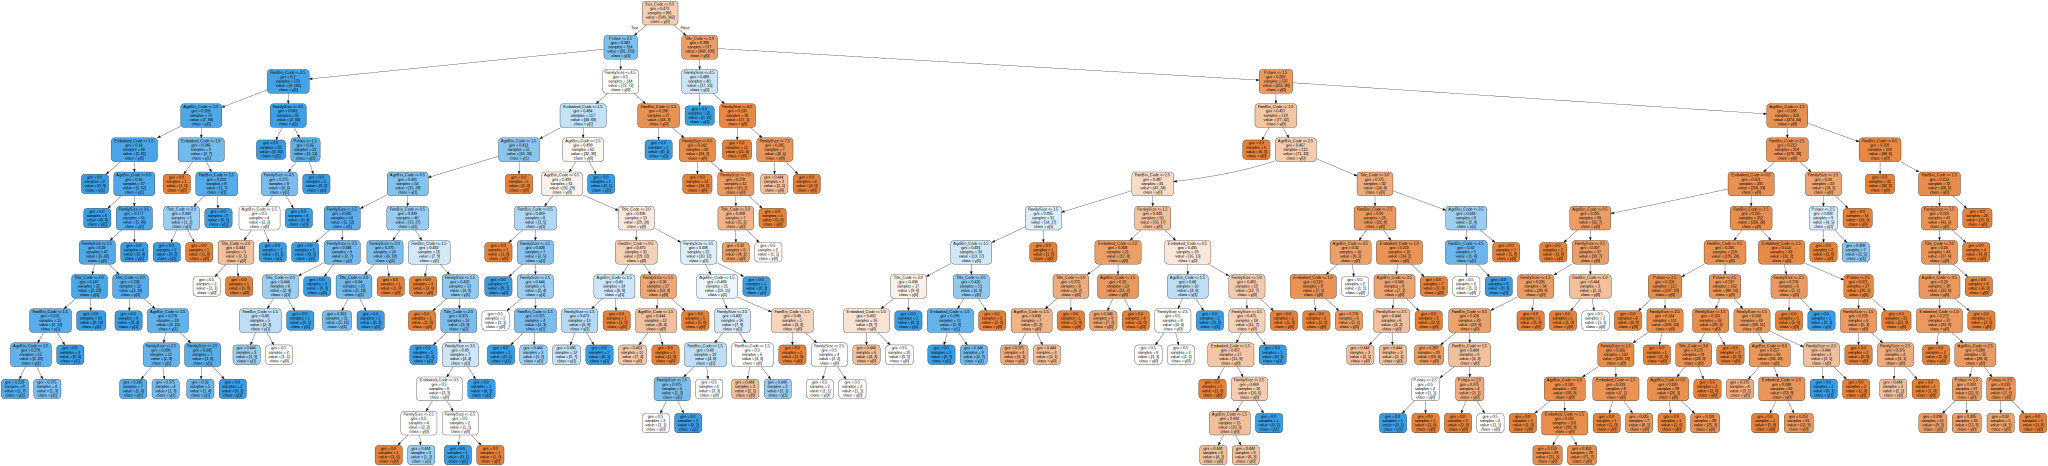

In [100]:
# Graph MLA version of Decision tree
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None,feature_names=data1_x_bin,class_names=True,filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph

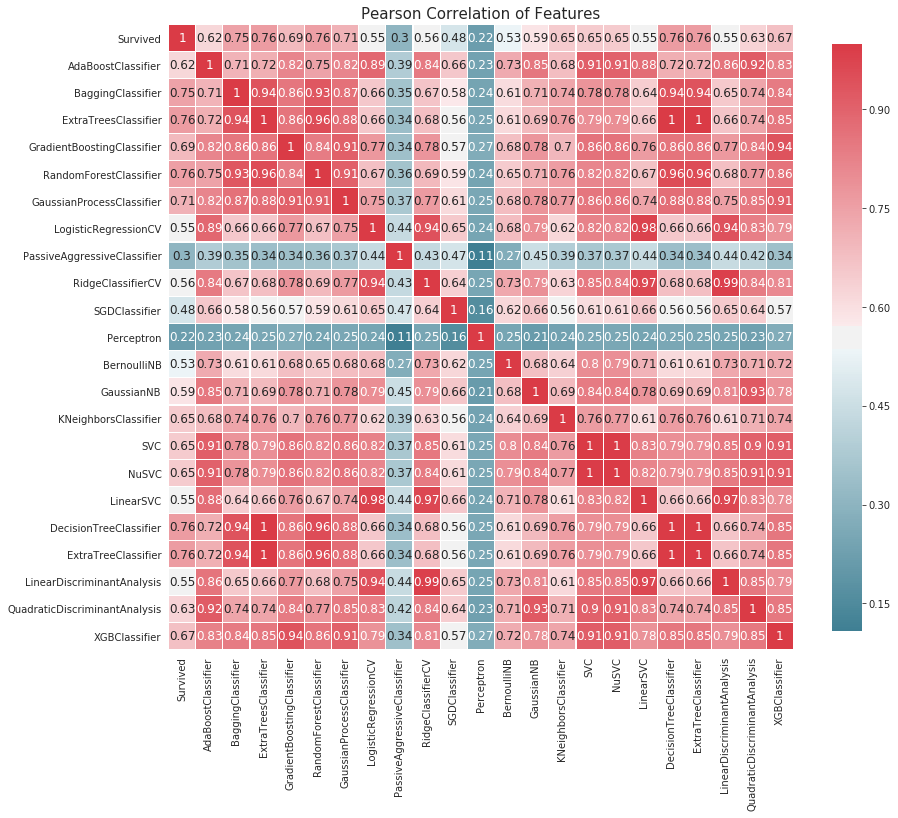

In [101]:
# Validate and Implement
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

In [102]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est =[
    #Ensemble Methods
    ('ada',ensemble.AdaBoostClassifier()),
    ('bc',ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc',ensemble.GradientBoostingClassifier()),
    ('rfc',ensemble.RandomForestClassifier()),
    
    #Gaussian Processes
    ('gpc',gaussian_process.GaussianProcessClassifier()),
    
    #GLM
    ('lr',linear_model.LogisticRegressionCV()),
    
    #Navies Bayes
    ('bnb',naive_bayes.BernoulliNB()),
    ('gnb',naive_bayes.GaussianNB()),
    
    #Nearest Neighbor
    ('knn',neighbors.KNeighborsClassifier()),
    
    #SVM
    ('svc',svm.SVC(probability=True)),
    
    #xgboost
    ('xgb',XGBClassifier())
]

#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard,data1[data1_x_bin],data1[Target],cv = cv_split,return_train_score=True)
print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('='*30)

#Soft vote or weighted prob
vote_soft = ensemble.VotingClassifier(estimators=vote_est,voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin],data1[Target],cv=cv_split,return_train_score=True)
vote_soft.fit(data1[data1_x_bin],data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('='*30)

Hard Voting Training w/bin score mean: 86.44
Hard Voting Test w/bin score mean: 82.69
Hard Voting Test w/bin score 3*std: +/- 4.75
Soft Voting Training w/bin score mean: 87.06
Soft Voting Test w/bin score mean: 82.28
Soft Voting Test w/bin score 3*std: +/- 3.79


In [103]:
#WARNING: Running is very computational intensive and time expensive.
#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param=[
    [{
      #AdaBoostClassifier
        'n_estimators':grid_n_estimator, #default=50
        'learning_rate':grid_learn, #default=1
        #'algorithm':['SAMME','SAMME.R'], #default='SAMME.R'
        'random_state':grid_seed
    }],
    [{
        #BaggingClassifier
        'n_estimators':grid_n_estimator, #default=10
        'max_samples': grid_ratio, #default=1.0
        'random_state': grid_seed
    }],
    
    [{
        #ExtraTreesClassifier
        'n_estimators': grid_n_estimator, #default=10
        'criterion': grid_criterion, #default=”gini”
        'max_depth': grid_max_depth, #default=None
        'random_state': grid_seed
    }],
    
    [{
        #GradientBoostingClassifier
        #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
    }],
    
    [{
        #RandomForestClassifier
        'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
    }],
    
    [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
    }],
        
    
    [{
            #LogisticRegressionCV 
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
    }],
            
    
    [{
            #BernoulliNB 
            'alpha': grid_ratio, #default: 1.0
    }],
    
            #GaussianNB - 
             [{}],
    
    [{
            #KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }],
            
    
    [{
            #SVC 
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
    }],

    [{
      #XGBClassifier
      'learning_rate': grid_learn, #default: .3
      'max_depth': [1,2,4,6,8,10], #default 2
      'n_estimators': grid_n_estimator, 
      'seed': grid_seed  
    }]   
]

start_total = time.perf_counter()
for clf, param in zip(vote_est, grid_param):
    start = time.perf_counter()
    best_search = model_selection.GridSearchCV(estimator=clf[1], param_grid=param,cv=cv_split, scoring='roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter()-start
    
    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param)
    
run_total = time.perf_counter()-start_total
print('Total optimization time was {:.2f} minutes'.format(run_total/60))

print('='*30)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.25, 'n_estimators': 100, 'random_state': 0} with a runtime of 42.57 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 42.75 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with a runtime of 76.01 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 45.55 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50, 'oob_score': True, 'random_state': 0} with a runtime of 115.67 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 8.07 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state'

In [104]:
# hard vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target],cv = cv_split,return_train_score=True)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('='*30)

#soft vote or weighted prob w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target],cv=cv_split,return_train_score=True)
grid_soft.fit(data1[data1_x_bin], data1[Target])
print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('='*30)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.54
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.24
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 4.48
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 85.39
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.35


In [105]:
#prepare data for modeling
print(data_val.info())
print('='*30)
data_val['Survived']=grid_hard.predict(data_val[data1_x_bin])
submit = data_val[['PassengerId','Survived']]
submit.to_csv('../working/submit.csv',index=False)
print('Validation Data Distribution: \n',data_val['Survived'].value_counts(normalize=True))
submit.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
Title_Code       418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.4+ KB
None
Validation Data Distribution: 
 0    0.641

,PassengerId,Survived
93,985,0
369,1261,0
197,1089,1
104,996,1
245,1137,0
3,895,0
92,984,1
151,1043,0
348,1240,0
100,992,1


In [106]:
print(data1.columns)
# data1[data1_x_bin]
data1_x_bin

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin', 'AgeBin',
       'Sex_Code', 'Embarked_Code', 'Title_Code', 'AgeBin_Code',
       'FareBin_Code'],
      dtype='object')


['Sex_Code',
 'Pclass',
 'Embarked_Code',
 'Title_Code',
 'FamilySize',
 'AgeBin_Code',
 'FareBin_Code']